# Collective progress

**Example notebook for creating anonymised, collective information on progress**

* Before running this notebook, you need to prepare the data you want to assess. To do so, please use the notebook - ""
* For testing, some example data is available in the folder "proc_data"
* Enter the name of the file that you wish to use in the first cell, after that you can run the full notebook with minimal changes. 

In [1]:
# import modules

# system 
import re
import os

# calculation
import pandas as pd
import numpy as np

# plotting
%matplotlib inline
import seaborn
import matplotlib

# global stocktake tools
from gst_tools.make_plots import *
import gst_tools.gst_utils as utils


In [2]:
# USER INPUT

# First, choose which file you want to plot the data for
#data_file_name = 'UN-population-data-2017.csv'
data_file_name = 'PRIMAP-hist_v2.0_Energy-CO2.csv'
#data_file_name = 'PRIMAP-hist_UN-2017_calc__CO2-per-population.csv'
#data_file_name = 'WDI2017_GDP-PPP.csv'

# Second, choose which years you are interested in analysing
years_of_interest = ['1990', '2000', '2014']


In [3]:
# DATA READING AND PREP

# read the data from file 
fname_in = os.path.join('proc-data', data_file_name)
data = pd.read_csv(fname_in)

# Check the data format
if not utils.verify_data_format(data):
    print('WARNING: The data is not correctly formatted! Please check before continuing!')

# extract the key information
variable = data['variable'].unique()[0]
unit = data['unit'].unique()[0]

# tidy up for next stesps
data_years = utils.set_countries_as_index(data)
data_years = data_years.dropna(axis=0, how='any')

# remove comment below to display the data
#data_years

In [4]:
# Plot 1 - make a histogram of absolute data

for selected_year in years_of_interest:
    make_histogram(data_years[selected_year], variable, unit, remove_outliers=True, save_plot=True)


-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 1990, dtype: float64)
upper outliers are: 
country
BRA    1.341000e+12
CAN    7.552000e+11
CHN    1.504000e+12
DEU    2.158000e+12
ESP    8.017000e+11
FRA    1.500000e+12
GBR    1.330000e+12
IDN    7.286000e+11
IND    1.340000e+12
ITA    1.534000e+12
JPN    3.266000e+12
MEX    9.326000e+11
RUS    2.657000e+12
USA    8.032000e+12
Name: 1990, dtype: float64
---
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2000, dtype: float64)
upper outliers are: 
country
BRA    1.730000e+12
CAN    1.000000e+12
CHN    4.057000e+12
DEU    2.624000e+12
ESP    1.055000e+12
FRA    1.845000e+12
GBR    1.685000e+12
IDN    1.066000e+12
IND    2.306000e+12
ITA    1.806000e+12
JPN    3.730000e+12
KOR    8.471000e+11
MEX    1.326000e+12
RUS    1.788000e+12
USA    1.127000e+13
Name: 2000, dtype: float64
---
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2014, d

In [4]:
# Plot 2 - trends

# Calculate trends and define plotting params    
# TODO - improve description here. 
trends, rolling_trends, trends_unit = utils.calculate_trends(data_years, num_years_trend=5)
trends_variable = 'Annual average change in ' + variable

# plot the trend in the final year
make_histogram(rolling_trends.iloc[:,-1], trends_variable, trends_unit, save_plot=True)


Averaging trend over 5 years.
bins set to range(-34, 34, 2)


Calculating difference compared to 1990
Calculating difference compared to 2005
---------
All values in the series are the same! Exiting plotting routine for change in CO2 from 1990 to 1990
---------
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2000, dtype: float64)
upper outliers are: 
country
GNQ    589.393939
LAO    313.425926
NPL    406.944444
TGO    359.770115
Name: 2000, dtype: float64
---
bins set to range(-252, 252, 21)
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2014, dtype: float64)
upper outliers are: 
country
BEN     907.168459
GNQ    8006.060606
NPL    1025.000000
QAT     805.172414
TGO     788.888889
Name: 2014, dtype: float64
---
bins set to range(-756, 756, 63)
bins set to range(-990, 990, 22)


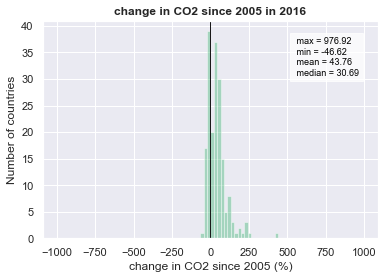

-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2016, dtype: float64)
upper outliers are: 
country
AFG    976.923077
MOZ    420.886076
Name: 2016, dtype: float64
---
bins set to range(-264, 264, 22)


In [5]:
# Plot 3 - change since year X

# run calculations of differences
df_abs_diff_1990, df_perc_diff_1990 = utils.calculate_diff_since_yearX(data_years, '1990')
df_abs_diff_2005, df_perc_diff_2005 = utils.calculate_diff_since_yearX(data_years, '2005')

# make plots

# change since 1990 in selected years
for selected_year in years_of_interest:
    make_histogram(df_perc_diff_1990[selected_year], ("change in " + variable + " from 1990 to " + str(selected_year)), 
                   "%", remove_outliers=True, 
                   kTuk=3, save_plot=True)

    
# changes since 2005 in final year of data
# first plot shown including outliers, second excludes them. 

make_histogram(df_perc_diff_2005.iloc[:,-1], ("change in " + variable + " since 2005"), '%', 
               remove_outliers=False, save_plot=False)

make_histogram(df_perc_diff_2005.iloc[:,-1], ("change in " + variable + " since 2005"), '%', 
               remove_outliers=True, save_plot=True)


# Note that the above code can be adapted for different years!

## Below here is code for testing and debugging!